The difference between the battery-merged.csv and battery.csv is that this version has removed all duplicate data points.(ex. 2 entries with same name and extracted property). I recommend using the battery-merged.csv for our data.

In [ ]:
import pandas as pd

In [ ]:
#please edit path so it makes sense with git architecture
data=pd.read_csv('/content/drive/MyDrive/Battery Data/battery_merged.csv') #loading data. I have also uploaded .csv to git.

In [ ]:
data.columns

Index(['Property', 'Name', 'Value', 'Raw_unit', 'Raw_value', 'Unit',
       'Num_records', 'Extracted_name', 'DOI', 'Specifier', 'Tag', 'Warning',
       'Type', 'Info', 'Title', 'Journal', 'Date', 'Correctness'],
      dtype='object')

In [ ]:
property_groups = {prop: df for prop, df in data.groupby('Property')} # grouping according to property

In [ ]:
property_groups['Capacity'].shape

(113171, 18)

Capacity is the largest subset of data but does not have annotated number of cycles for each property. We recommend using Voltage for an apples-to-apples comparison.

In [ ]:
property_groups['Capacity']

,Property,Name,Value,Raw_unit,Raw_value,Unit,Num_records,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,Title,Journal,Date,Correctness
0,Capacity,Fe2O3 / C,659.0,mAhg−1,and 659,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Fe': '2.0', 'O': '3.0'}, {'C': '1.0'}]",10.1016/j.jallcom.2011.10.022,"discharge and charge capacity,",CDE,"S,",NaN,NaN,SOLVOTHERMALPREPARATIONLITHIUMSTORAGEPROPERTIE...,Journal of Alloys and Compounds,2011-10-17,NaN
3,Capacity,Li2C8H4O4,85.0,mAhg−1,85,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Li': '2.0', 'C': '8.0', 'H': '4.0', 'O': '4...",10.1016/j.pnsc.2016.06.004,"charge capacity,",CDE,"S,",NaN,"{'current_value': '0.2', 'current_units': 'C'},",ADESIGNEDCORESHELLSTRUCTURALCOMPOSITELITHIUMTE...,Progress in Natural Science: Materials Interna...,2016-08-10,NaN
4,Capacity,NVP / C,83.0,mAhg−1,"96.6 , 90.5 , 86.8 , 83.0 , 77.1 , 68.0 , and ...",Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'N': '1.0', 'V': '1.0', 'P': '1.0'}, {'C': '...",10.1016/j.ensm.2019.05.041,"discharge capacities,",CDE,"S,",NaN,"{'current_value': '1', 'current_units': 'C'},",UNDERSTANDINGSUPERIORSODIUMIONSTORAGEINANOVELN...,Energy Storage Materials,2019-06-01,NaN
5,Capacity,NiBr / Ni,90.0,mAh/g,"151 , 126 , and 90",Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Ni': '1.0', 'Br': '1.0'}, {'Ni': '1.0'}]",10.1016/j.ensm.2019.08.021,NaN,CDE,"S,",NaN,NaN,ELUCIDATINGROLEANIONICCHEMISTRYTOWARDSHIGHRATE...,Energy Storage Materials,2019-08-29,NaN
6,Capacity,Cu(OH)2,895.0,mAh/g,895 and 707,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'O': '2.0', 'H': '2.0', 'Cu': '1.0'}]",10.1016/j.matlet.2012.09.006,"discharge and charge capacities,",CDE,NaN,NaN,NaN,FACILESYNTHESISCUONANORODFORLITHIUMSTORAGEAPPL...,Materials Letters,2012-09-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214607,Capacity,Li2MnO3,240.0,mAhg−1,240,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),3,"[{'Li': '2.0', 'Mn': '1.0', 'O': '3.0'}]","10.1016/j.jpowsour.2015.01.045, 10.1039/C4CC07...","discharge capacity, discharge capacities,",CDE,"R,",NaN,NaN,MNSOURCEEFFECTSELECTROCHEMICALPROPERTIESFEANDN...,"Journal of Power Sources, Chemical Communicati...","2015-01-07, 2015/01/15, 2005-04-27",NaN
214608,Capacity,NiO-G-Ni,734.0,mAhg−1,734,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Ni': '1.0', 'O': '1.0'}]",10.1016/j.matchemphys.2018.09.061,"discharge capacity,",CDE,NaN,NaN,NaN,SUPERIORLIIONSTORAGEPERFORMANCEGRAPHENEDECORAT...,Materials Chemistry and Physics,2018-10-01,NaN
214610,Capacity,Se / NPCP,307.8,mAhg−1,351.6 and 307.8,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Se': '1.0'}, {'N': '1.0', 'P': '2.0', 'C': ...",10.1039/C8TA11999F,NaN,CDE,NaN,"Cathode,","{'current_value': '0.5', 'current_units': 'C'},",Sodium-based batteries: from critical material...,Journal of Materials Chemistry A,2019/04/16,NaN
214614,Capacity,Mg2Si,50.0,mAhg−1,to 50,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),3,"[{'Mg': '2.0', 'Si': '1.0'}]","10.1016/j.jpowsour.2007.06.074, 10.1016/j.mssp...","capacity,",CDE,"S, S,",NaN,"{'cycle_value': '5', 'cycle_units': 'cycles'},",STUDYMG2SICARBONCOMPOSITESANODEMATERIALSFORLIT...,"Journal of Power Sources, Materials Science in...","2007-06-23, 2014-09-18, 2018-02-28",NaN


In [ ]:
shared_key=[] #I'm trying to save the names of data subset for graphing
shared_pop=[] # saving number of entries of data subset for graphing
for key, df in property_groups.items():
    shared_key.append(key)
    shared_pop.append(df.shape[0])


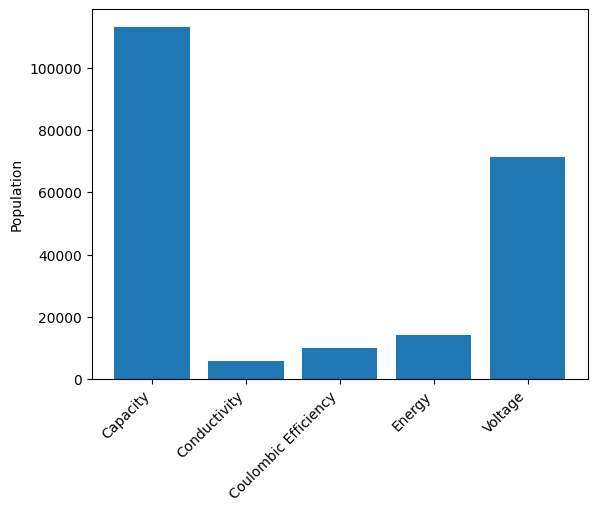

In [ ]:
import matplotlib.pyplot as plt
#shared_key_str = [f"{k[0]} & {k[1]}" for k in shared_key]
plt.bar(shared_key,shared_pop)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Population')
plt.savefig('Subset_pop.png',dpi=300)

In [ ]:
df = pd.DataFrame(data)

# Group by 'Extracted_name'
g = df.groupby('Extracted_name')

# Create a dictionary to store DataFrames for each Extracted_name with different Property values combined
grouped_dfs = {}

# Loop through each group and combine their rows
for name, group in g:
    # Append all the rows with the same Extracted_name into a single DataFrame
    group = group.drop_duplicates(subset='Property', keep='first')
    grouped_dfs[name] = group  # Store the whole group (with all Property values)



In [ ]:
from itertools import combinations


# Start by collecting all rows from all grouped_dfs
all_data = pd.concat(grouped_dfs.values())

# Get all unique property combinations (pairwise)
unique_properties = all_data['Property'].unique()
property_pairs = combinations(unique_properties, 2)

# Dictionary to store the final dataframes
final_pairwise_dfs = {}

for prop1, prop2 in property_pairs:
    # Filter rows where Property is either prop1 or prop2
    filtered = all_data[all_data['Property'].isin([prop1, prop2])]

    # Group by Extracted_name and keep only those with both properties
    grouped = filtered.groupby('Extracted_name')
    valid_entries = []

    for name, group in grouped:
        if set([prop1, prop2]).issubset(set(group['Property'])):
            # Extract only the two rows and pivot to a single row
            pivoted = group.set_index('Property')['Value'].loc[[prop1, prop2]]
            pivoted_df = pd.DataFrame(pivoted).T
            pivoted_df['Extracted_name'] = name
            valid_entries.append(pivoted_df)

    # Combine all valid entries into one DataFrame
    if valid_entries:
        final_df = pd.concat(valid_entries, ignore_index=True)
        # Reorder columns to have name first (optional)
        cols = ['Extracted_name', prop1, prop2]
        final_pairwise_dfs[f"{prop1}-{prop2}"] = final_df[cols]




In [ ]:

key_name=[] # getting name of property combinations subset
key_pop=[] #getting number of entries of property combination subset
for key in final_pairwise_dfs.keys():
  key_name.append(str(key))
  key_pop.append(int(final_pairwise_dfs[key].shape[0]))

If we are interested in predicting multiple properties, I do not recommend do anything including capacity.

Text(0, 0.5, 'Population')

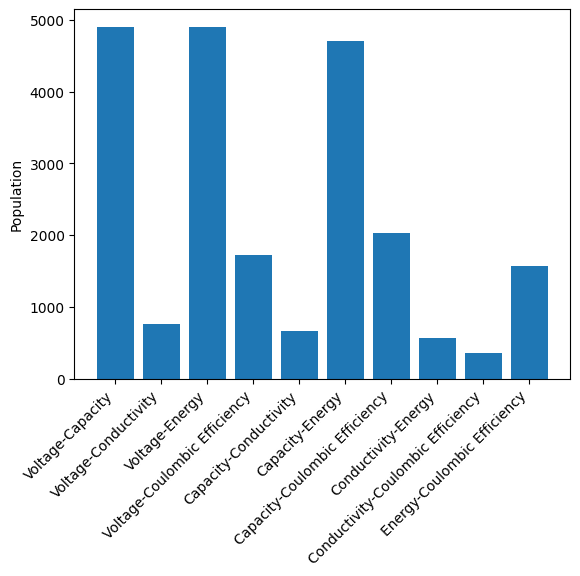

In [ ]:

#shared_key_str = [f"{k[0]} & {k[1]}" for k in shared_key]
plt.bar(key_name,key_pop)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Population')